<a href="https://colab.research.google.com/github/graphlit/graphlit-samples/blob/main/python/Notebook%20Examples/Graphlit_2024_12_12_Describe_Image_with_OpenAI_Compatible_Moondream_Vision_LLM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Description**

This example shows how to use Graphlit to describe a provided image using the new [Moondream vision LLM](https://moondream.ai/).

**Requirements**

Prior to running this notebook, you will need to [signup](https://docs.graphlit.dev/getting-started/signup) for Graphlit, and [create a project](https://docs.graphlit.dev/getting-started/create-project).

You will need the Graphlit organization ID, preview environment ID and JWT secret from your created project.

Assign these properties as Colab secrets: GRAPHLIT_ORGANIZATION_ID, GRAPHLIT_ENVIRONMENT_ID and GRAPHLIT_JWT_SECRET.

You will need to [signup](https://console.moondream.ai/) for the Moondream API and create an API key.

Assign this property as Colab secret: MOONDREAM_API_KEY.

---

Install Graphlit Python client SDK

In [ ]:
!pip install --upgrade graphlit-client

Initialize Graphlit

In [ ]:
import os
from google.colab import userdata
from graphlit import Graphlit
from graphlit_api import input_types, enums, exceptions

os.environ['GRAPHLIT_ORGANIZATION_ID'] = userdata.get('GRAPHLIT_ORGANIZATION_ID')
os.environ['GRAPHLIT_ENVIRONMENT_ID'] = userdata.get('GRAPHLIT_ENVIRONMENT_ID')
os.environ['GRAPHLIT_JWT_SECRET'] = userdata.get('GRAPHLIT_JWT_SECRET')

graphlit = Graphlit()

os.environ['MOONDREAM_API_KEY'] = userdata.get('MOONDREAM_API_KEY')


Define Graphlit helper functions

In [ ]:
from typing import List, Optional

async def create_moondream_specification():
    if graphlit.client is None:
        return;

    # specify OpenAI-compatible model, by assigning model name, API endpoint and API key
    input = input_types.SpecificationInput(
        name=f"Moondream",
        type=enums.SpecificationTypes.EXTRACTION,
        serviceType=enums.ModelServiceTypes.OPEN_AI,
        openAI=input_types.OpenAIModelPropertiesInput(
            model=enums.OpenAIModels.CUSTOM,
            modelName="moondream-2B",
            endpoint="https://api.moondream.ai/v1",
            key=os.environ['MOONDREAM_API_KEY']
        )
    )

    try:
        response = await graphlit.client.create_specification(input)

        return response.create_specification.id if response.create_specification is not None else None
    except exceptions.GraphQLClientError as e:
        print(str(e))
        return None

async def describe_image(prompt: str, uri: str, specification_id: Optional[str] = None):
    if graphlit.client is None:
        return None

    try:
        response = await graphlit.client.describe_image(prompt=prompt, uri=uri, specification=input_types.EntityReferenceInput(id=specification_id) if specification_id is not None else None)

        return response.describe_image.message if response.describe_image is not None else None
    except exceptions.GraphQLClientError as e:
        print(str(e))
        return None

async def delete_all_specifications():
    if graphlit.client is None:
        return;

    _ = await graphlit.client.delete_all_specifications(is_synchronous=True)


Execute Graphlit example

In [ ]:
from IPython.display import display, Markdown, HTML, Image
import time

# Remove any existing specifications; only needed for notebook example
await delete_all_specifications()

print('Deleted all specifications.')

Deleted all specifications.


Create Moondream specification

In [ ]:
specification_id = await create_moondream_specification()

if specification_id is not None:
    print(f'Created specification [{specification_id}].')

Created specification [0145233d-4127-4d04-8e7f-80a1257cb52e].


Specify the image to describe

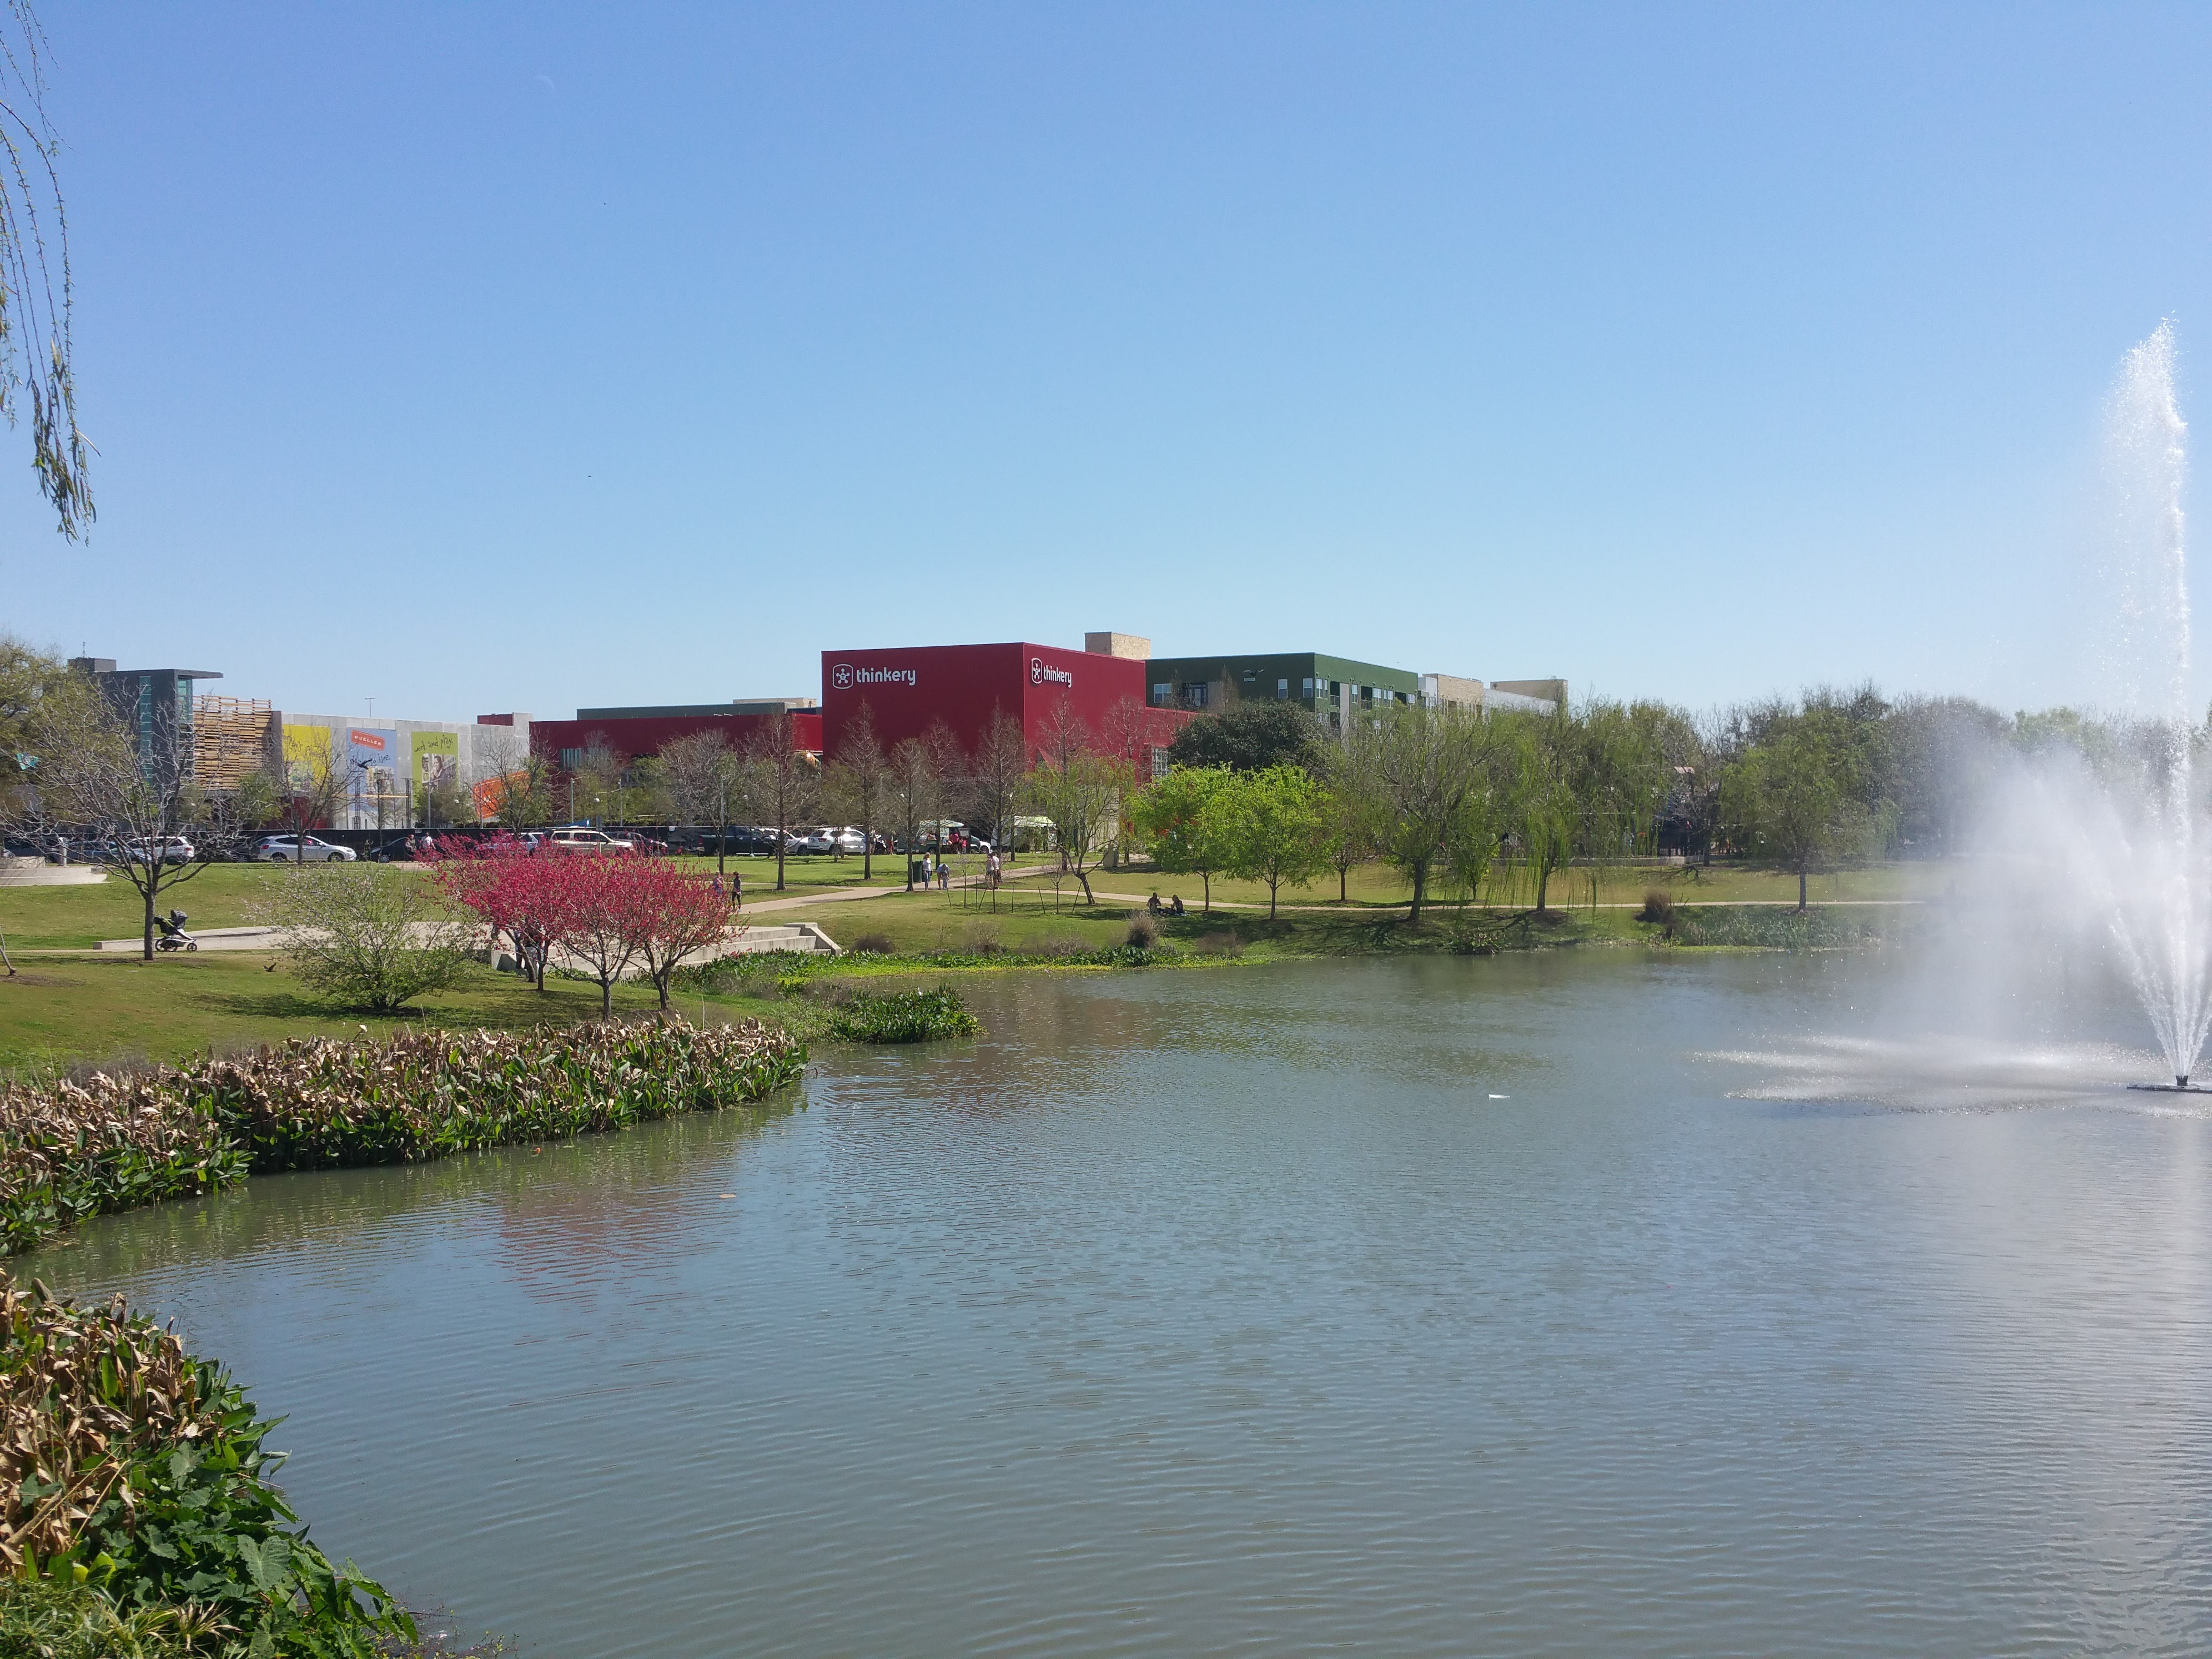

In [ ]:
#uri = "https://graphlitplatform.blob.core.windows.net/test/images/2657-Emerging-LLM-App-Stack-R2-1-of-4-2.png"
uri = "https://graphlitplatform.blob.core.windows.net/test/images/20160313_123815.jpg"

display(Image(uri, height=500))

Describe the image with Moondream

In [ ]:
prompt = "Thoroughly describe this image."

if specification_id is not None:
    message = await describe_image(prompt, uri, specification_id)

    if message is not None:
        display(Markdown(f'**Moondream Description:**'))
        display(Markdown(message))


**Moondream Description:**

The image depicts a serene park scene with a tranquil pond in the foreground. The pond is surrounded by lush greenery, including trees and bushes, and features a fountain spraying water into the air. In the background, a red building with a green roof stands out against the clear blue sky. A few people can be seen walking along a path near the pond. The pond is bordered by a grassy area, and a small section of a paved path is visible near the water's edge. The water in the pond appears relatively calm.

Describe the image with GPT-4o, for comparison

In [ ]:
    message = await describe_image(prompt, uri) # using default GPT-4o model

    if message is not None:
        display(Markdown(f'**GPT-4o Description:**'))
        display(Markdown(message))


**GPT-4o Description:**

The image depicts a serene park scene with a large pond in the foreground. A fountain on the right side of the pond is spraying water into the air, creating a misty effect. The pond is surrounded by lush greenery, including various trees and shrubs, some of which have vibrant red blossoms. 

In the background, there are modern buildings with colorful facades, including a prominent red building with the word "thinkery" visible on it. The sky is clear and blue, suggesting a sunny day. People can be seen walking and sitting in the park, enjoying the pleasant weather. The overall atmosphere is peaceful and inviting, with a blend of natural and urban elements.